# Project : Price Prediction of Laptops

Name: Mabin Mariam Joseph

Group members: Chris Mathew Dani, Mabin Joseph

Project Description: In this project, we scan through the best ecommerce websites and extract the list of all laptop products available in the market. The goal is to create a logistic regression algorithm that predicts the price of laptop, given the specifications with the highest accuracy.

In [691]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction import DictVectorizer
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_predict
from sklearn.dummy import DummyRegressor
from sklearn import cluster
%matplotlib inline

In [692]:
#import data
inputdata_df = pd.read_csv("laptop_list.csv")

#Data preprocessing
def data_preprocess(data):
    
    columns = list(data.columns)
    strings = columns[0:9]
            
    for col in strings:
        data[col] = data[col].fillna('type 0')
    return data

#Encode categorical values in data
def one_hot_dataframe(data, cols, replace=False):
    vec = DictVectorizer()
    mkdict = lambda row: dict((col, row[col]) for col in cols)
    vecData = pd.DataFrame(vec.fit_transform(data[cols].apply(mkdict, axis=1)).toarray())
    vecData.columns = vec.get_feature_names()
    vecData.index = data.index
    if replace is True:
        data = data.drop(cols, axis=1)
        data = data.join(vecData)
    return (data)

preprocessed = data_preprocess(inputdata_df)

df = one_hot_dataframe(preprocessed, ['Touch Screen','OS'], replace=True)
print("(Number of data instances,Number of features)")
print(df.shape)
print(df.columns)
df.head()

(Number of data instances,Number of features)
(748, 16)
Index(['Retail Price', 'Pro Speed', 'HDD', 'RAM', 'Screen Size', 'Weight',
       'Ratings', 'OS=Chrome OS', 'OS=Mac OS', 'OS=Windows', 'OS=Windows 10',
       'OS=Windows 7', 'OS=Windows 8.1', 'OS=Windows7', 'Touch Screen=No',
       'Touch Screen=Yes'],
      dtype='object')


,Retail Price,Pro Speed,HDD,RAM,Screen Size,Weight,Ratings,OS=Chrome OS,OS=Mac OS,OS=Windows,OS=Windows 10,OS=Windows 7,OS=Windows 8.1,OS=Windows7,Touch Screen=No,Touch Screen=Yes
0,299.99,2.1,1000,4,15.6,4.85,4.3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,349.99,2.4,1000,6,15.6,4.72,4.2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,179.99,1.6,500,4,15.6,4.85,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,999.99,1.6,128,8,13.3,2.96,4.8,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,249.99,1.6,500,4,15.6,4.41,4.1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [693]:
def type_conversion(cols):
    df[cols] = df[cols].convert_objects(convert_numeric=True)
    df[cols].fillna(0,inplace=True)

type_conversion('HDD')
type_conversion('RAM')
type_conversion('Screen Size')
 
#separate data from target attributes
X = df[['Pro Speed', 'HDD', 'RAM', 'Screen Size', 'Weight', 'Ratings','OS=Chrome OS', 'OS=Mac OS', 'OS=Windows', 'OS=Windows 10', 'OS=Windows 7', 'OS=Windows 8.1', 'OS=Windows7', 'Touch Screen=No', 'Touch Screen=Yes']]
y = df[['Retail Price']]

#Standardize the continuous features (vectorized features are excluded)
standard_X1 = preprocessing.scale(df[['Pro Speed', 'HDD', 'RAM', 'Screen Size', 'Weight', 'Ratings']])
standard_df = pd.DataFrame(standard_X1,columns=['Pro Speed', 'RAM', 'Screen Size', 'Weight', 'Ratings',
       'HDD'])
standard_df.head()

print(standard_X1.shape)
print(df.shape)
XFinal = pd.merge(X,standard_df,how= "left")
print(XFinal.shape)
XFinal.head()

(748, 6)
(748, 16)
(748, 15)


C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app


,Pro Speed,HDD,RAM,Screen Size,Weight,Ratings,OS=Chrome OS,OS=Mac OS,OS=Windows,OS=Windows 10,OS=Windows 7,OS=Windows 8.1,OS=Windows7,Touch Screen=No,Touch Screen=Yes
0,2.1,1000.0,4,15.6,4.85,4.3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,2.4,1000.0,6,15.6,4.72,4.2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.6,500.0,4,15.6,4.85,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1.6,128.0,8,13.3,2.96,4.8,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.6,500.0,4,15.6,4.41,4.1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


# Performance

Dummy Regressor is used as the baseline for performance.This regressor is useful as a simple baseline to compare with other (real) regressors

In [694]:
print('DUMMY REGRESSOR')
print('---------------')
clf0 = DummyRegressor()
clf0.fit(x_train,y_train)
predicted0 = clf0.predict(x_test)
print("Score: ",clf0.score(x_test,y_test))

DUMMY REGRESSOR
---------------
Score:  -0.000939998306439


In [695]:
print('LINEAR REGRESSION')
print('-----------------')
clf1 = linear_model.LinearRegression()
clf1.fit(x_train,y_train)
predicted1 = clf1.predict(x_test)
print("Model Score : ",clf1.score(x_test,y_test))
print("\nCoefficients of features")
print("-------------------------")
for i in range (15):
    print(XFinal.columns[i]," :",clf1.coef_[0,i])
    
print("\nCross Value Scores: ",cross_val_score(clf1, XFinal, y,cv=10)) 
print("\nCross Value Scores with r2 scoring: ",cross_val_score(clf1, XFinal, y,cv=10,scoring='r2')) 
print("\nCross Value Scores with neg_mean_absolute_error scoring: ",cross_val_score(clf1, XFinal, y,cv=10,scoring='neg_mean_absolute_error')) 
print("\nCross Value Scores with neg_mean_squared_error scoring: ",cross_val_score(clf1, XFinal, y,cv=10,scoring='neg_mean_squared_error')) 
print("\nCross Value Scores with neg_median_absolute_error scoring: ",cross_val_score(clf1, XFinal, y,cv=10,scoring='neg_median_absolute_error')) 

LINEAR REGRESSION
-----------------
Model Score :  0.69239679433

Coefficients of features
-------------------------
Pro Speed  : 133.036795865
HDD  : 0.0826243781153
RAM  : 72.2821616511
Screen Size  : -15.567903815
Weight  : 10.0450888414
Ratings  : -0.782088105318
OS=Chrome OS  : -217.576142372
OS=Mac OS  : 697.888720879
OS=Windows  : -1.13686837722e-13
OS=Windows 10  : -70.3379752417
OS=Windows 7  : -384.520733203
OS=Windows 8.1  : -25.4538700615
OS=Windows7  : 0.0
Touch Screen=No  : -34.8261323821
Touch Screen=Yes  : 34.8261323821

Cross Value Scores:  [ 0.63423916  0.5943895   0.57984911  0.57076086  0.67179417  0.66636439
  0.58865638  0.81590963  0.68911555  0.7510896 ]

Cross Value Scores with r2 scoring:  [ 0.63423916  0.5943895   0.57984911  0.57076086  0.67179417  0.66636439
  0.58865638  0.81590963  0.68911555  0.7510896 ]

Cross Value Scores with neg_mean_absolute_error scoring:  [-232.43275356 -311.13852406 -287.35895768 -318.12877168 -286.85815731
 -327.81653542 -376.00

In [696]:
print('LASSO REGRESSION')
print('----------------')
clf2 = linear_model.Lasso()
clf2.fit(x_train,y_train)
predicted2 = clf2.predict(x_test)
print("Model Score : ",clf2.score(x_test,y_test))
print("\nCoefficients of features")
print("-------------------------")
for i in range (15): 
    print(XFinal.columns[i]," :",clf2.coef_[i])
    
print("\nCross Value Scores: ",cross_val_score(clf2, XFinal, y,cv=10)) 
print("\nCross Value Scores with r2 scoring: ",cross_val_score(clf2, XFinal, y,cv=10,scoring='r2')) 
print("\nCross Value Scores with neg_mean_absolute_error scoring: ",cross_val_score(clf2, XFinal, y,cv=10,scoring='neg_mean_absolute_error')) 
print("\nCross Value Scores with neg_mean_squared_error scoring: ",cross_val_score(clf2, XFinal, y,cv=10,scoring='neg_mean_squared_error')) 
print("\nCross Value Scores with neg_median_absolute_error scoring: ",cross_val_score(clf2, XFinal, y,cv=10,scoring='neg_median_absolute_error')) 

LASSO REGRESSION
----------------
Model Score :  0.691078586489

Coefficients of features
-------------------------
Pro Speed  : 127.377973116
HDD  : 0.0881854176845
RAM  : 72.653838155
Screen Size  : -15.5672071016
Weight  : 9.50751672179
Ratings  : 0.0
OS=Chrome OS  : -135.502196082
OS=Mac OS  : 736.539931395
OS=Windows  : 0.0
OS=Windows 10  : 0.0
OS=Windows 7  : -305.267356598
OS=Windows 8.1  : 0.0
OS=Windows7  : 0.0
Touch Screen=No  : -58.2647355303
Touch Screen=Yes  : 0.0

Cross Value Scores:  [ 0.65985963  0.58212786  0.5795762   0.57229613  0.67182366  0.66612067
  0.59439594  0.81581545  0.687221    0.74972697]

Cross Value Scores with r2 scoring:  [ 0.65985963  0.58212786  0.5795762   0.57229613  0.67182366  0.66612067
  0.59439594  0.81581545  0.687221    0.74972697]

Cross Value Scores with neg_mean_absolute_error scoring:  [-224.4402535  -319.01367767 -288.50509566 -317.3591731  -286.99325343
 -329.09055789 -370.98171876 -348.16915511 -337.89498984 -264.93375097]

Cross Val

In [697]:
print('RIDGE REGRESSION')
print('----------------')
clf3 = linear_model.Ridge()
clf3.fit(x_train,y_train)
predicted3 = clf3.predict(x_test)
print("Model Score : ",clf3.score(x_test,y_test))
print("\nCoefficients of features")
print("-------------------------")
for i in range (15): 
    print(XFinal.columns[i]," :",clf3.coef_[0,i])
    
print("\nCross Value Scores: ",cross_val_score(clf3, XFinal, y,cv=10)) 
print("\nCross Value Scores with r2 scoring: ",cross_val_score(clf3, XFinal, y,cv=10,scoring='r2')) 
print("\nCross Value Scores with neg_mean_absolute_error scoring: ",cross_val_score(clf3, XFinal, y,cv=10,scoring='neg_mean_absolute_error')) 
print("\nCross Value Scores with neg_mean_squared_error scoring: ",cross_val_score(clf3, XFinal, y,cv=10,scoring='neg_mean_squared_error')) 
print("\nCross Value Scores with neg_median_absolute_error scoring: ",cross_val_score(clf3, XFinal, y,cv=10,scoring='neg_median_absolute_error')) 

RIDGE REGRESSION
----------------
Model Score :  0.691054038059

Coefficients of features
-------------------------
Pro Speed  : 131.592188041
HDD  : 0.0864790850347
RAM  : 72.6251607175
Screen Size  : -16.5846686458
Weight  : 9.13603466882
Ratings  : 1.17685282815
OS=Chrome OS  : -195.996321125
OS=Mac OS  : 624.146735424
OS=Windows  : 0.0
OS=Windows 10  : -56.5178265851
OS=Windows 7  : -358.848682089
OS=Windows 8.1  : -12.7839056252
OS=Windows7  : 0.0
Touch Screen=No  : -31.7455918059
Touch Screen=Yes  : 31.7455918059

Cross Value Scores:  [ 0.6619781   0.58511792  0.57975809  0.57152631  0.67118733  0.66579019
  0.58941181  0.81593531  0.68933221  0.7508536 ]

Cross Value Scores with r2 scoring:  [ 0.6619781   0.58511792  0.57975809  0.57152631  0.67118733  0.66579019
  0.58941181  0.81593531  0.68933221  0.7508536 ]

Cross Value Scores with neg_mean_absolute_error scoring:  [-224.15932504 -316.9190867  -288.19189669 -317.91983583 -287.08442716
 -327.97824685 -375.34503119 -348.61225

In [698]:
print('ELASTIC NET REGRESSION')
print('----------------------')
clf4 = linear_model.ElasticNet(alpha=80)
clf4.fit(x_train,y_train)
predicted4 = clf4.predict(x_test)
print("Model Score : ",clf4.score(x_test,y_test))
print("\nCoefficients of features")
print("-------------------------")
for i in range (15): 
    print(XFinal.columns[i]," :",clf4.coef_[i])
    
print("\nCross Value Scores: ",cross_val_score(clf4, XFinal, y,cv=10)) 
print("\nCross Value Scores with r2 scoring: ",cross_val_score(clf4, XFinal, y,cv=10,scoring='r2')) 
print("\nCross Value Scores with neg_mean_absolute_error scoring: ",cross_val_score(clf4, XFinal, y,cv=10,scoring='neg_mean_absolute_error')) 
print("\nCross Value Scores with neg_mean_squared_error scoring: ",cross_val_score(clf4, XFinal, y,cv=10,scoring='neg_mean_squared_error')) 
print("\nCross Value Scores with neg_median_absolute_error scoring: ",cross_val_score(clf4, XFinal, y,cv=10,scoring='neg_median_absolute_error')) 

ELASTIC NET REGRESSION
----------------------
Model Score :  0.591931712851

Coefficients of features
-------------------------
Pro Speed  : 0.573845882333
HDD  : 0.445939617674
RAM  : 38.7135392104
Screen Size  : 0.0
Weight  : 1.49853542663
Ratings  : 0.0200785670263
OS=Chrome OS  : -0.0
OS=Mac OS  : 0.0
OS=Windows  : 0.0
OS=Windows 10  : 0.0
OS=Windows 7  : -0.0
OS=Windows 8.1  : 0.0
OS=Windows7  : 0.0
Touch Screen=No  : -0.0
Touch Screen=Yes  : 0.0

Cross Value Scores:  [ 0.09394082  0.0734485   0.38528016  0.45261087  0.66428129  0.55338333
  0.56822356  0.72751101  0.58185898  0.62169276]

Cross Value Scores with r2 scoring:  [ 0.09394082  0.0734485   0.38528016  0.45261087  0.66428129  0.55338333
  0.56822356  0.72751101  0.58185898  0.62169276]

Cross Value Scores with neg_mean_absolute_error scoring:  [-362.71782385 -527.40878206 -370.34406824 -398.45945545 -320.08723464
 -415.06861397 -407.26972256 -436.54210385 -437.52469106 -341.24809678]

Cross Value Scores with neg_mean_sq

In [699]:
print('ORTHOGONAL MATCHING PURSUIT REGRESSION')
print('--------------------------------------')
clf6 = linear_model.OrthogonalMatchingPursuit()
clf6.fit(x_train,y_train)
predicted6 = clf6.predict(x_test)
print("Model Score : ",clf6.score(x_test,y_test))
print("\nCoefficients of features")
print("-------------------------")
for i in range (15): 
    print(XFinal.columns[i]," :",clf6.coef_[i])
    
print("\nCross Value Scores: ",cross_val_score(clf6, XFinal, y,cv=10)) 
print("\nCross Value Scores with r2 scoring: ",cross_val_score(clf6, XFinal, y,cv=10,scoring='r2')) 
print("\nCross Value Scores with neg_mean_absolute_error scoring: ",cross_val_score(clf6, XFinal, y,cv=10,scoring='neg_mean_absolute_error')) 
print("\nCross Value Scores with neg_mean_squared_error scoring: ",cross_val_score(clf6, XFinal, y,cv=10,scoring='neg_mean_squared_error')) 
print("\nCross Value Scores with neg_median_absolute_error scoring: ",cross_val_score(clf6, XFinal, y,cv=10,scoring='neg_median_absolute_error')) 

ORTHOGONAL MATCHING PURSUIT REGRESSION
--------------------------------------
Model Score :  0.615877501944

Coefficients of features
-------------------------
Pro Speed  : 0.0
HDD  : 0.0
RAM  : 82.1872525395
Screen Size  : 0.0
Weight  : 0.0
Ratings  : 0.0
OS=Chrome OS  : 0.0
OS=Mac OS  : 0.0
OS=Windows  : 0.0
OS=Windows 10  : 0.0
OS=Windows 7  : 0.0
OS=Windows 8.1  : 0.0
OS=Windows7  : 0.0
Touch Screen=No  : 0.0
Touch Screen=Yes  : 0.0

Cross Value Scores:  [ 0.51407439  0.27220668  0.53731342  0.5678292   0.57599965  0.55155175
  0.57493289  0.77864454  0.67606498  0.64580487]

Cross Value Scores with r2 scoring:  [ 0.51407439  0.27220668  0.53731342  0.5678292   0.57599965  0.55155175
  0.57493289  0.77864454  0.67606498  0.64580487]

Cross Value Scores with neg_mean_absolute_error scoring:  [-256.92984674 -435.38892661 -301.6276094  -331.5533416  -319.46633541
 -374.85845116 -406.9284994  -375.36877498 -371.7799137  -317.12629009]

Cross Value Scores with neg_mean_squared_error sco

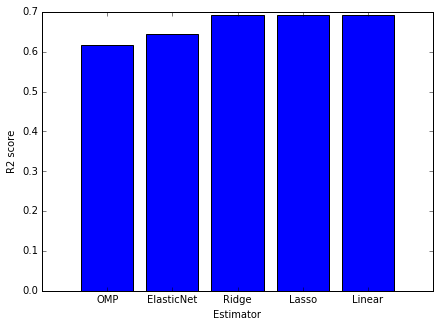

In [701]:
rs = 1
ests = [ linear_model.LinearRegression(), linear_model.Ridge(),
        linear_model.Lasso(), linear_model.ElasticNet(), linear_model.OrthogonalMatchingPursuit() ]
ests_labels = np.array(['Linear', 'Ridge', 'Lasso', 'ElasticNet', 'OMP'])
errvals = np.array([])


for e in ests:
    e.fit(x_train, y_train)
    this_err = metrics.r2_score(y_test, e.predict(x_test))
    #print "got error %0.2f" % this_err
    errvals = np.append(errvals, this_err)

pos = np.arange(errvals.shape[0])
srt = np.argsort(errvals)
plt.figure(figsize=(7,5))
plt.bar(pos, errvals[srt], align='center')
plt.xticks(pos, ests_labels[srt])
plt.xlabel('Estimator')
plt.ylabel('R2 score')
